# Create training sub set
Create a random subset of training and val data either on a balanced set of chexpert diseases or on just one disease.

In [1]:
#hermione created: 14/07/2023
import pandas as pd
import numpy as np

import nltk
nltk.download('punkt')  # Download necessary data for tokenization

from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package punkt to /home/hermione/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:

train = pd.read_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/train.csv")
chexpert = pd.read_csv("/home/hermione/Documents/data/physionet.org/files/mimic-cxr-jpg/2.0.0/mimic-cxr-2.0.0-chexpert.csv")
val = pd.read_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/valid.csv")
test = pd.read_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/test.csv")
train_chex = pd.merge(train, chexpert, on=['subject_id', 'study_id'])
val_chex = pd.merge(val, chexpert, on=['subject_id', 'study_id'])
test_chex = pd.merge(test, chexpert, on=['subject_id', 'study_id'])

#summary = pd.DataFrame(columns = chexpert.columns[2:], index = ["chexpert", "train", "val"])
summary = pd.DataFrame(columns = chexpert.columns[2:], index = ["chexpert", "train", "val","test"])
diseases = chexpert.columns[2:]

for col in diseases:
    #print(col)
    def dis_sum(data):
        return np.sum(data[data[col]==1][col].astype(int))
    """ def dis_frac(data):
        subset = data.iloc[2:]
        denom = int(sum([(subset[subset[d] == 1][d].astype(int)).sum() for d in diseases]))
        frac = dis_sum(data)/denom
        return frac """
    #summary[col] = [dis_sum(chexpert), dis_sum(train_chex), dis_sum(val_chex)]
    summary[col] = [dis_sum(chexpert), dis_sum(train_chex), dis_sum(val_chex), dis_sum(test_chex)]
    #print(np.sum(chexpert[chexpert[col]==1][col].astype(int)))
    #print(np.sum(train_chex[train_chex[col]==1][col].astype(int)))
    #print(np.sum(val_chex[val_chex[col]==1][col].astype(int)))

print(len(chexpert), len(train), len(val), len(train))
print(len(chexpert), len(train_chex), len(val_chex), len(train_chex))
#print(summary.sum(axis=1))
summary["total"] = summary.sum(axis=1)

summary.T #potentially make percentage
#summary.to_csv("summary.csv", index=False)

227827 33510 4894 33510
227827 33510 4894 33510


,chexpert,train,val,test
Atelectasis,45808,5110,753,1580
Cardiomegaly,44845,4036,611,1340
Consolidation,10778,856,104,276
Edema,27018,3003,499,993
Enlarged Cardiomediastinum,7179,613,70,191
Fracture,4390,638,75,170
Lung Lesion,6284,801,111,236
Lung Opacity,51525,6631,984,2056
No Finding,75455,14514,2055,4305
Pleural Effusion,54300,5595,825,1701


In [25]:
print(train_chex[train_chex["Pleural Effusion"] == 1].iloc[8,3])
print(train_chex[train_chex["Pleural Effusion"] == 1].iloc[8,4])
train_chex[train_chex["Pleural Effusion"] == 1].iloc[:,:5]

/home/hermione/Documents/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10002428/s54831516/852306b6-02fc04aa-82d30dbf-0c2dd18d-5c9ef054.jpg
Comparison is made to previous study from ___. There is a Dobbhoff tube whose distal tip is in the body of the stomach. There are bilateral pleural effusions. There is a right-sided pleural-based catheter. There is no pneumothoraces or signs for overt pulmonary edema. Overall, these findings are stable since prior study from ___.


,subject_id,study_id,image_id,mimic_image_file_path,reference_report
4,10000980,57861150,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,/home/hermione/Documents/data/physionet.org/fi...,Heart size remains mild to moderately enlarged...
5,10000980,58206436,54affd39-8bf24209-232bac8a-df6c277a-398ee8a5,/home/hermione/Documents/data/physionet.org/fi...,In comparison to study performed on of ___ the...
6,10000980,59988438,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,/home/hermione/Documents/data/physionet.org/fi...,PA and lateral views of the chest demonstrate ...
18,10002013,58054149,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,/home/hermione/Documents/data/physionet.org/fi...,A moderate left pleural effusion is new since ...
19,10002131,52823782,051b7911-cb00aec9-0b309188-89803662-303ec278,/home/hermione/Documents/data/physionet.org/fi...,Frontal and lateral chest radiographs demonstr...
...,...,...,...,...,...
33407,12005748,54314058,31934fa6-8a51ab44-b81b1eac-522b7757-478c4ff4,/home/hermione/Documents/data/physionet.org/fi...,There is cardiomegaly accompanied by vascular ...
33455,12461334,59813777,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,/home/hermione/Documents/data/physionet.org/fi...,There is leftward effusion increased opacity i...
33463,12509458,51239211,964cc30a-f4549f80-99ecfb9c-d498554e-2db3da2d,/home/hermione/Documents/data/physionet.org/fi...,There is moderate cardiomegaly. The patient is...
33488,12738545,54211667,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,/home/hermione/Documents/data/physionet.org/fi...,Moderate cardiomegaly persists. Aortic knob is...


In [6]:

#summary_frac = pd.DataFrame(columns=summary.columns[:-1], index=summary.index)
summary_frac = []
for row in summary.index:
    columns =[]
    for col in diseases:
        def frac(data):
            return np.round(data.loc[row,col]/data.loc[row, "total"],3)
        columns.append(frac(summary))
    summary_frac.append(columns)

summary_frac_df = pd.DataFrame(summary_frac ,columns=summary.columns[:-1], index=summary.index)
summary_frac_df.T.to_csv("summary_frac.csv", index=False)
summary_frac_df.T

,chexpert,train,val,test
Atelectasis,0.108,0.099,0.100,0.100
Cardiomegaly,0.106,0.078,0.081,0.085
Consolidation,0.025,0.017,0.014,0.018
Edema,0.064,0.058,0.067,0.063
Enlarged Cardiomediastinum,0.017,0.012,0.009,0.012
Fracture,0.010,0.012,0.010,0.011
Lung Lesion,0.015,0.016,0.015,0.015
Lung Opacity,0.122,0.129,0.131,0.131
No Finding,0.178,0.282,0.274,0.273
Pleural Effusion,0.128,0.109,0.110,0.108


In [15]:
#select data
train_data_index = train_chex[train_chex["No Finding"] == 1].sample(frac=(1/3), random_state=1).index
val_data_index = val_chex[val_chex["No Finding"] == 1].sample(frac=(1/3), random_state=1).index
train_data = train_chex[train_chex.index.isin(train_data_index)| (train_chex["Pleural Effusion"] == 1)]

val_data = val_chex[val_chex.index.isin(val_data_index) | (val_chex["Pleural Effusion"] == 1)]

print(train_data.columns, len(train_data))
train_final = train_data[['subject_id', 'study_id', 'image_id', 'mimic_image_file_path','reference_report']]
val_final = val_data[['subject_id', 'study_id', 'image_id', 'mimic_image_file_path','reference_report']]
print(len(train_final), len(val_final))

Index(['subject_id', 'study_id', 'image_id', 'mimic_image_file_path',
       'reference_report', 'Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
       'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices'],
      dtype='object') 10433
10433 1510


In [4]:
train_final.to_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/train_subset.csv",index=False)
val_final.to_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/valid_subset.csv", index=False)

In [133]:
#select data
train_data= train_chex[(train_chex["Cardiomegaly"] == 1) | (train_chex["Pleural Effusion"] == 1)] #.sample(n=10000, random_state=1).index, (train_chex["Cardiomegaly"] == 1) | 
val_data= val_chex[(val_chex["Cardiomegaly"] == 1) |(val_chex["Pleural Effusion"] == 1)] #.sample(n=1500, random_state=1).index, (val_chex["Cardiomegaly"] == 1) | 
test_data= test_chex[(test_chex["Cardiomegaly"] == 1) |(test_chex["Pleural Effusion"] == 1)] 
#train_data = train_chex[~train_chex.index.isin(train_data_index)]
#val_data = val_chex[~val_chex.index.isin(val_data_index)]

print(train_data.columns, len(train_data))
train_final = train_data[['subject_id', 'study_id', 'image_id', 'mimic_image_file_path','reference_report']]
val_final = val_data[['subject_id', 'study_id', 'image_id', 'mimic_image_file_path','reference_report']]
test_final = test_data[['subject_id', 'study_id', 'image_id', 'mimic_image_file_path','reference_report']]
print(len(train_final), len(val_final))

#train_final.to_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/train_PE.csv",index=False)
#val_final.to_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/valid_PE.csv", index=False)
#test_final.to_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/test_card_vs_PE.csv", index=False)

Index(['subject_id', 'study_id', 'image_id', 'mimic_image_file_path',
       'reference_report', 'Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
       'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices'],
      dtype='object') 8331
8331 1258


1258

In [19]:
#definitly not overlapping
print(train_final[train_final["mimic_image_file_path"].isin(val_final["mimic_image_file_path"])])

Empty DataFrame
Columns: [subject_id, study_id, image_id, mimic_image_file_path, reference_report]
Index: []


# Remake Datasets from bounding box reports
This shouls hopefully only keep pathology relevant line rather than scan veiws or many references to previos scans. 
Well i tried

In [49]:
from ast import literal_eval
train_bb = pd.read_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports_original/train.csv").drop(columns=["bbox_coordinates","bbox_labels","bbox_is_abnormal", "bbox_phrase_exists"])
train_bb["reference_report"] = [". ".join(list(set([i.lstrip() for i in (" ".join(" ".join(literal_eval(phrases)).split()).split("."))]))) for phrases in train_bb["bbox_phrases"]]


In [46]:

train_bb = train_bb.drop(columns=["bbox_phrases"])
print(len(train_bb))
val_bb = train_bb.sample(frac=0.1, random_state=1)
train_bb = train_bb[~train_bb["image_id"].isin(val_bb["image_id"])]
test_bb = train_bb.sample(n=len(val_bb), random_state=1)
train_bb = train_bb[~train_bb["image_id"].isin(test_bb["image_id"])]
val_bb

49311


,subject_id,study_id,image_id,mimic_image_file_path,reference_report
18647,11172056,50366239,324f2928-3d040888-70b3742c-f2c3b988-63cc7617,/home/hermione/Documents/data/physionet.org/fi...,. No pneumothorax or effusion. New right upper...
48959,10766641,55573119,abbfc4d2-4c08ecd5-95216c83-f9e7e8d4-f0e03a44,/home/hermione/Documents/data/physionet.org/fi...,. The heart size and cardiomediastinal contour...
22567,11400517,56972034,f60572ea-5c0e131d-0be53637-2333841e-2c930ea3,/home/hermione/Documents/data/physionet.org/fi...,. The cardiac and mediastinal silhouettes are ...
35385,12144619,58964820,bf5c0d9f-b4cb1207-607aacb3-f6a24029-04dec268,/home/hermione/Documents/data/physionet.org/fi...,. Borderline size of the cardiac silhouette. N...
34886,12124186,52107348,dbf88c6a-071650e5-0ec82dc7-b4f58f7f-54c13ee5,/home/hermione/Documents/data/physionet.org/fi...,"No focal consolidation, pleural effusion or pn..."
...,...,...,...,...,...
21826,11346699,50584318,617afa71-673719dc-0dbecb50-028de5c8-38e3434e,/home/hermione/Documents/data/physionet.org/fi...,. The degree of pulmonary edema appears to be ...
14664,10922531,51051513,8646ffe3-5b8b6570-bbc7fb58-c8489fe0-9af4b9ac,/home/hermione/Documents/data/physionet.org/fi...,. The heart is top- normal size given the larg...
9265,10584015,51857744,ceca7221-1f04d4e0-e3048c54-6671d2f4-5faf37e6,/home/hermione/Documents/data/physionet.org/fi...,. The hilar and mediastinal structures are unr...
5520,10353355,53929101,397b0512-87c35ce7-490c463c-51fc61fb-07eb75e6,/home/hermione/Documents/data/physionet.org/fi...,. Left lower lobe pneumonia. There is interval...


In [37]:
print(len(train_bb), len(val_bb), len(test_bb))
print(len(train), len(val), len(test))

39449 4931 4931
33510 4894 10147


In [50]:
print(train_bb["reference_report"][0])
print(train_bb["reference_report"][1])
#print(train_bb["bbox_phrases"][0])
train_bb

. Heart is top-normal size, improved, and pleural effusions have resolved. Previous mild pulmonary edema and possible concurrent pneumonia has all cleared. Lateral view shows atherosclerotic coronary calcification in the left circumflex. Right hilar vessels are still enlarged, perhaps due to pulmonary arterial hypertension
There is also fullness of the right hilum which is new. . The heart size is top normal. However, given right hilar fullness, a mass resulting in post-obstructive pneumonia is within the differential. Right upper lobe pneumonia or mass. Blunting of bilateral costophrenic angles, right greater than left, may be secondary to small effusions. A triangular opacity in the right lung apex is new from prior examination. The remainder of the lungs are clear


,subject_id,study_id,image_id,mimic_image_file_path,bbox_phrases,reference_report
0,10000980,50985099,6ad03ed1-97ee17ee-9cf8b320-f7011003-cd93b42d,/home/hermione/Documents/data/physionet.org/fi...,['Previous mild pulmonary edema and possible c...,". Heart is top-normal size, improved, and pleu..."
1,10000980,51967283,943486a3-b3fa9ff7-50f5a769-7a62fcbb-f39b6da4,/home/hermione/Documents/data/physionet.org/fi...,['A triangular opacity in the right lung apex ...,There is also fullness of the right hilum whic...
2,10000980,54577367,cfb03587-782edf6c-1bf392e1-98196cd5-365d69e8,/home/hermione/Documents/data/physionet.org/fi...,['There is minimal upper zone vascular redistr...,. There is minimal upper zone vascular redistr...
3,10000980,54935705,6ad819bb-bae74eb9-7b663e90-b8deabd7-57f8054a,/home/hermione/Documents/data/physionet.org/fi...,['There are possible small bilateral pleural e...,. There is mild pulmonary edema with superimpo...
4,10000980,54980801,a75a1fbe-802065ad-717eb7c1-e2ce3552-646276a6,/home/hermione/Documents/data/physionet.org/fi...,"['The lungs are clear of consolidation, effusi...",. No acute cardiopulmonary process. Cardiac si...
...,...,...,...,...,...,...
49306,12958472,52582935,e689d7cb-52bc8526-f000f9b6-1ec8ebe2-0ea8e4f6,/home/hermione/Documents/data/physionet.org/fi...,"['Pulmonary edema, moderate right pleural effu...",". The heart is top normal size, exaggerated by..."
49307,12958472,57693298,ef33ed50-3103c924-869900f8-dfb73dd3-8b1f0c0a,/home/hermione/Documents/data/physionet.org/fi...,['Moderate right pleural effusion and multifoc...,. There is also at least mild pulmonary edema....
49308,12963147,56053808,665650b7-273d4330-d61f391c-8a4663ab-22ae3715,/home/hermione/Documents/data/physionet.org/fi...,['Lungs are low in volume resulting in broncho...,. Mild vascular congestion. Bibasilar linear a...
49309,12989742,59169029,d072a686-274dbd4a-aa1d2b90-61ba527b-d4b9ebdd,/home/hermione/Documents/data/physionet.org/fi...,"['The lungs appear lucent in the upper lobes, ...",. Subtle reticular opacities in the left lower...


## Make data subset of cardiomegaly and plueral effusion

But just take the sentence that refers to the disease from the report and drop the rest to see if it can learn features like a classifier.


In [8]:
train_subset = pd.read_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/train_PE_card.csv")
train_subset

,subject_id,study_id,image_id,mimic_image_file_path,reference_report
0,10000980,57861150,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,/home/hermione/Documents/data/physionet.org/fi...,Heart size remains mild to moderately enlarged...
1,10000980,58206436,54affd39-8bf24209-232bac8a-df6c277a-398ee8a5,/home/hermione/Documents/data/physionet.org/fi...,In comparison to study performed on of ___ the...
2,10000980,59988438,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,/home/hermione/Documents/data/physionet.org/fi...,PA and lateral views of the chest demonstrate ...
3,10001217,58913004,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,/home/hermione/Documents/data/physionet.org/fi...,"As compared to the previous radiograph, there ..."
4,10002013,58054149,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,/home/hermione/Documents/data/physionet.org/fi...,A moderate left pleural effusion is new since ...
...,...,...,...,...,...
8326,12461334,59813777,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,/home/hermione/Documents/data/physionet.org/fi...,There is leftward effusion increased opacity i...
8327,12509458,51239211,964cc30a-f4549f80-99ecfb9c-d498554e-2db3da2d,/home/hermione/Documents/data/physionet.org/fi...,There is moderate cardiomegaly. The patient is...
8328,12738545,54211667,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,/home/hermione/Documents/data/physionet.org/fi...,Moderate cardiomegaly persists. Aortic knob is...
8329,12855989,57262022,7f3b4261-424d9da8-250bdaca-42aac275-bc9d53a2,/home/hermione/Documents/data/physionet.org/fi...,"As compared to the previous radiograph, the pa..."


In [9]:
diseases = chexpert.columns[2:]
diseases = diseases.drop(['Cardiomegaly','Pleural Effusion'])

In [38]:
diseases

Index(['Atelectasis', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum',
       'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding',
       'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices'],
      dtype='object')

In [10]:
train_chex_subset = pd.merge(train_subset, train_chex, on =['subject_id', 'study_id', 'image_id', 'mimic_image_file_path','reference_report']).drop(columns=diseases.tolist())
train_chex_subset = train_chex_subset[~((train_chex_subset["Cardiomegaly"] == 1) & (train_chex_subset["Pleural Effusion"] == 1))]
train_chex_subset

,subject_id,study_id,image_id,mimic_image_file_path,reference_report,Cardiomegaly,Pleural Effusion
0,10000980,57861150,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,/home/hermione/Documents/data/physionet.org/fi...,Heart size remains mild to moderately enlarged...,NaN,1.0
2,10000980,59988438,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,/home/hermione/Documents/data/physionet.org/fi...,PA and lateral views of the chest demonstrate ...,NaN,1.0
3,10001217,58913004,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,/home/hermione/Documents/data/physionet.org/fi...,"As compared to the previous radiograph, there ...",1.0,NaN
4,10002013,58054149,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,/home/hermione/Documents/data/physionet.org/fi...,A moderate left pleural effusion is new since ...,NaN,1.0
5,10002131,52823782,051b7911-cb00aec9-0b309188-89803662-303ec278,/home/hermione/Documents/data/physionet.org/fi...,Frontal and lateral chest radiographs demonstr...,NaN,1.0
...,...,...,...,...,...,...,...
8325,12252716,51570385,f451ed66-eabaaa46-3687eab5-24472516-3f874596,/home/hermione/Documents/data/physionet.org/fi...,Single portable radiograph of the chest demons...,1.0,0.0
8326,12461334,59813777,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,/home/hermione/Documents/data/physionet.org/fi...,There is leftward effusion increased opacity i...,NaN,1.0
8328,12738545,54211667,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,/home/hermione/Documents/data/physionet.org/fi...,Moderate cardiomegaly persists. Aortic knob is...,NaN,1.0
8329,12855989,57262022,7f3b4261-424d9da8-250bdaca-42aac275-bc9d53a2,/home/hermione/Documents/data/physionet.org/fi...,"As compared to the previous radiograph, the pa...",1.0,0.0


In [18]:
#reports_list_card = [[index,sent_tokenize(report)] for index, report in train_chex_subset[['image_id','reference_report']] if (train_chex_subset['Cardiomegaly'].iloc[index]==1.0)] 
reports_list_card = [[image_id, sent_tokenize(report)] for image_id, report in train_chex_subset.loc[train_chex_subset['Cardiomegaly'] == 1.0, ['image_id', 'reference_report']].values]
#simple_reports = [sent for sent in report for report in reports_list if 'Heart' in sent]
simple_reports = []
for i, report in reports_list_card:
    for sent in report:
        if ('Heart' in sent) or ('heart' in sent) or ('cardiomegaly' in sent) or ('Cardiomegaly' in sent) or ('Cardiac' in sent) or ('cardiac' in sent):
            simple_reports.append((i,sent))
simple_reports_pd_card = pd.DataFrame(simple_reports, columns=["ind","simple_reports"])

#reports_list_PE = [[index,sent_tokenize(report)] for index, report in enumerate(train_chex_subset['reference_report']) if (train_chex_subset['Pleural Effusion'].iloc[index]==1.0)] 
reports_list_PE = [[image_id, sent_tokenize(report)] for image_id, report in train_chex_subset.loc[train_chex_subset['Pleural Effusion'] == 1.0, ['image_id', 'reference_report']].values]

#simple_reports = [sent for sent in report for report in reports_list if 'Heart' in sent]
simple_reports = []
for i, report in reports_list_PE:
    for sent in report:
        if ('pleural effusion' in sent) or ('Pleural effusion' in sent) or ('effusion' in sent) or ('pleural' in sent):
            simple_reports.append((i,sent))
simple_reports_pd_PE = pd.DataFrame(simple_reports, columns=["ind","simple_reports"])
simple_reports_pd_PE

,ind,simple_reports
0,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,Blunting of the costophrenic angles bilaterall...
1,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,Tiny bilateral pleural effusions are new since...
2,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,A moderate left pleural effusion is new since ...
3,051b7911-cb00aec9-0b309188-89803662-303ec278,Frontal and lateral chest radiographs demonstr...
4,051b7911-cb00aec9-0b309188-89803662-303ec278,These effusions are large on the right and sma...
...,...,...
5475,31934fa6-8a51ab44-b81b1eac-522b7757-478c4ff4,"Alternatively, this may represent soft tissue ..."
5476,31934fa6-8a51ab44-b81b1eac-522b7757-478c4ff4,"Left pleural effusion is small if any, and the..."
5477,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,There is leftward effusion increased opacity i...
5478,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,"Trace bilateral pleural effusions are present,..."


In [19]:
#simple_reports_pd_card = pd.DataFrame(simple_reports, columns=["ind","simple_reports"])
simple_reports_pd_card

,ind,simple_reports
0,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,Borderline size of the cardiac silhouette.
1,69c64be9-ed77fb62-7fad1785-d91de463-0fbf5c4b,Moderate cardiomegaly is increased compared to...
2,f5414268-e553a141-39841839-4f303c85-d94d1190,The heart is mild to moderately enlarged but u...
3,7a6f7a0e-452b83e5-d8388f3b-c424f2e2-83d372bd,"Moderate cardiomegaly is grossly stable, as ar..."
4,60b87cf4-16cae318-9e395a6c-8627d25c-9a39a71a,The cardiac silhouette is enlarged.
...,...,...
2979,dffc8ab2-ff37704f-2fb29e6d-51e08075-88bca914,"There is cardiomegaly, but no CHF."
2980,2c3ad0f5-99243382-95475fd4-195c8ea1-d08d9453,The heart is moderately enlarged.
2981,0a05d517-7fb37071-d5242897-453cec7e-9241f662,The cardiac silhouette is mildly enlarged.
2982,f451ed66-eabaaa46-3687eab5-24472516-3f874596,Single portable radiograph of the chest demons...


In [20]:
simple_reports_pd = pd.merge(simple_reports_pd_card, simple_reports_pd_PE, on='ind', how='outer')
simple_reports_pd

,ind,simple_reports_x,simple_reports_y
0,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,Borderline size of the cardiac silhouette.,NaN
1,69c64be9-ed77fb62-7fad1785-d91de463-0fbf5c4b,Moderate cardiomegaly is increased compared to...,NaN
2,f5414268-e553a141-39841839-4f303c85-d94d1190,The heart is mild to moderately enlarged but u...,NaN
3,7a6f7a0e-452b83e5-d8388f3b-c424f2e2-83d372bd,"Moderate cardiomegaly is grossly stable, as ar...",NaN
4,60b87cf4-16cae318-9e395a6c-8627d25c-9a39a71a,The cardiac silhouette is enlarged.,NaN
...,...,...,...
8459,31934fa6-8a51ab44-b81b1eac-522b7757-478c4ff4,NaN,"Alternatively, this may represent soft tissue ..."
8460,31934fa6-8a51ab44-b81b1eac-522b7757-478c4ff4,NaN,"Left pleural effusion is small if any, and the..."
8461,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,NaN,There is leftward effusion increased opacity i...
8462,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,NaN,"Trace bilateral pleural effusions are present,..."


In [21]:
print(simple_reports_pd['ind'].dtype)

object


In [129]:
simple_reports_pd.iloc[0]['simple_reports_x']

'Borderline size of the cardiac silhouette.'

In [22]:
# Group by ‘Number’ column and concatenate the text entries from ‘Text1’ and ‘Text2’
#combo_reports = simple_reports.groupby('index').agg({'simple_reports_x': ' '.join, 'simple_reports_y': ' '.join}).reset_index()

def combine_with_nan(group):
    combined_text = ' '.join(group.drop_duplicates(['simple_reports_x', 'simple_reports_y'])[['simple_reports_x', 'simple_reports_y']].stack())
    return pd.Series({'combined': combined_text})
combo_reports = simple_reports_pd.groupby('ind').apply(combine_with_nan).reset_index()
combo_reports

,ind,combined
0,001604af-0c163110-29d5e224-7a942277-b88f3bc5,Small right apical pneumothorax is minimally d...
1,001888e6-f9d643f9-9120ca72-a0f10ecc-3095912f,There is improvement in aeration of the right ...
2,0029f094-e1187396-f327f13e-e36e8000-594cb5cb,There is increased mild bilateral pulmonary ed...
3,003a78ab-2ea9dea0-9c61e3b4-64183f9c-3cd6b404,There is an unchanged cardiomegaly.
4,003d69a6-4080ab84-7f48efab-7bf35097-3b2f5a5f,There is a small right-sided pleural effusion ...
...,...,...
6826,ffded8d2-6f1a6703-63d84247-3f821632-1c2b7c53,Small left pleural effusion is again demonstra...
6827,ffec27d1-6c62b923-43b8fe05-f4eec070-34d1b8a8,"In comparison with study of ___, there is cont..."
6828,ffee7878-19b88739-52eacb48-78461a37-eae68bf2,Mild cardiomegaly is noted.
6829,fff38e22-856c5f8a-f84e0741-ec391c46-b63bb3fb,The heart appears mildly enlarged.


In [23]:
simple_reports_final = pd.merge(train_chex_subset, combo_reports, left_on=train_chex_subset.image_id, right_on=combo_reports['ind'])
simple_reports_final

,key_0,subject_id,study_id,image_id,mimic_image_file_path,reference_report,Cardiomegaly,Pleural Effusion,ind,combined
0,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,10000980,57861150,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,/home/hermione/Documents/data/physionet.org/fi...,Heart size remains mild to moderately enlarged...,NaN,1.0,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,Blunting of the costophrenic angles bilaterall...
1,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,10000980,59988438,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,/home/hermione/Documents/data/physionet.org/fi...,PA and lateral views of the chest demonstrate ...,NaN,1.0,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,Tiny bilateral pleural effusions are new since...
2,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,10001217,58913004,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,/home/hermione/Documents/data/physionet.org/fi...,"As compared to the previous radiograph, there ...",1.0,NaN,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,Borderline size of the cardiac silhouette.
3,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,10002013,58054149,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,/home/hermione/Documents/data/physionet.org/fi...,A moderate left pleural effusion is new since ...,NaN,1.0,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,A moderate left pleural effusion is new since ...
4,051b7911-cb00aec9-0b309188-89803662-303ec278,10002131,52823782,051b7911-cb00aec9-0b309188-89803662-303ec278,/home/hermione/Documents/data/physionet.org/fi...,Frontal and lateral chest radiographs demonstr...,NaN,1.0,051b7911-cb00aec9-0b309188-89803662-303ec278,Frontal and lateral chest radiographs demonstr...
...,...,...,...,...,...,...,...,...,...,...
6826,f451ed66-eabaaa46-3687eab5-24472516-3f874596,12252716,51570385,f451ed66-eabaaa46-3687eab5-24472516-3f874596,/home/hermione/Documents/data/physionet.org/fi...,Single portable radiograph of the chest demons...,1.0,0.0,f451ed66-eabaaa46-3687eab5-24472516-3f874596,Single portable radiograph of the chest demons...
6827,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,12461334,59813777,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,/home/hermione/Documents/data/physionet.org/fi...,There is leftward effusion increased opacity i...,NaN,1.0,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,There is leftward effusion increased opacity i...
6828,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,12738545,54211667,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,/home/hermione/Documents/data/physionet.org/fi...,Moderate cardiomegaly persists. Aortic knob is...,NaN,1.0,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,"Trace bilateral pleural effusions are present,..."
6829,7f3b4261-424d9da8-250bdaca-42aac275-bc9d53a2,12855989,57262022,7f3b4261-424d9da8-250bdaca-42aac275-bc9d53a2,/home/hermione/Documents/data/physionet.org/fi...,"As compared to the previous radiograph, the pa...",1.0,0.0,7f3b4261-424d9da8-250bdaca-42aac275-bc9d53a2,Moderate cardiomegaly.


In [24]:
final = simple_reports_final[['subject_id', 'study_id', 'image_id', 'mimic_image_file_path','combined']] 
final = final.rename(columns={'combined':'reference_report'})
final.to_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/train_subset_simplified.csv", index=False)
final

,subject_id,study_id,image_id,mimic_image_file_path,reference_report
0,10000980,57861150,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,/home/hermione/Documents/data/physionet.org/fi...,Blunting of the costophrenic angles bilaterall...
1,10000980,59988438,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,/home/hermione/Documents/data/physionet.org/fi...,Tiny bilateral pleural effusions are new since...
2,10001217,58913004,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,/home/hermione/Documents/data/physionet.org/fi...,Borderline size of the cardiac silhouette.
3,10002013,58054149,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,/home/hermione/Documents/data/physionet.org/fi...,A moderate left pleural effusion is new since ...
4,10002131,52823782,051b7911-cb00aec9-0b309188-89803662-303ec278,/home/hermione/Documents/data/physionet.org/fi...,Frontal and lateral chest radiographs demonstr...
...,...,...,...,...,...
6826,12252716,51570385,f451ed66-eabaaa46-3687eab5-24472516-3f874596,/home/hermione/Documents/data/physionet.org/fi...,Single portable radiograph of the chest demons...
6827,12461334,59813777,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,/home/hermione/Documents/data/physionet.org/fi...,There is leftward effusion increased opacity i...
6828,12738545,54211667,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,/home/hermione/Documents/data/physionet.org/fi...,"Trace bilateral pleural effusions are present,..."
6829,12855989,57262022,7f3b4261-424d9da8-250bdaca-42aac275-bc9d53a2,/home/hermione/Documents/data/physionet.org/fi...,Moderate cardiomegaly.


In [122]:
print(simple_reports_final['reference_report'].iloc[1])
print(simple_reports_final['combined'].iloc[1])

In comparison to study performed on of ___ there is new mild pulmonary edema with small bilateral pleural effusions. Lung volumes have decreased with crowding of vasculature. No pneumothorax. Severe cardiomegaly is likely accentuated due to low lung volumes and patient positioning.
Severe cardiomegaly is likely accentuated due to low lung volumes and patient positioning. In comparison to study performed on of ___ there is new mild pulmonary edema with small bilateral pleural effusions.


## Make Fake data

make artificial difference between card and PE to see if model can identify that. Big white square.

In [25]:
final = pd.read_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/train_subset_simplified.csv")
final

,subject_id,study_id,image_id,mimic_image_file_path,reference_report
0,10000980,57861150,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,/home/hermione/Documents/data/physionet.org/fi...,Blunting of the costophrenic angles bilaterall...
1,10000980,59988438,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,/home/hermione/Documents/data/physionet.org/fi...,Tiny bilateral pleural effusions are new since...
2,10001217,58913004,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,/home/hermione/Documents/data/physionet.org/fi...,Borderline size of the cardiac silhouette.
3,10002013,58054149,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,/home/hermione/Documents/data/physionet.org/fi...,A moderate left pleural effusion is new since ...
4,10002131,52823782,051b7911-cb00aec9-0b309188-89803662-303ec278,/home/hermione/Documents/data/physionet.org/fi...,Frontal and lateral chest radiographs demonstr...
...,...,...,...,...,...
6826,12252716,51570385,f451ed66-eabaaa46-3687eab5-24472516-3f874596,/home/hermione/Documents/data/physionet.org/fi...,Single portable radiograph of the chest demons...
6827,12461334,59813777,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,/home/hermione/Documents/data/physionet.org/fi...,There is leftward effusion increased opacity i...
6828,12738545,54211667,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,/home/hermione/Documents/data/physionet.org/fi...,"Trace bilateral pleural effusions are present,..."
6829,12855989,57262022,7f3b4261-424d9da8-250bdaca-42aac275-bc9d53a2,/home/hermione/Documents/data/physionet.org/fi...,Moderate cardiomegaly.


In [26]:
diseases = chexpert.columns[2:]
diseases = diseases.drop(['Cardiomegaly','Pleural Effusion'])
#not sure the index and reports are right wait to use final
with_chex = pd.merge(final, chexpert, on=['subject_id', 'study_id']).drop(columns=diseases.tolist())
with_chex

,subject_id,study_id,image_id,mimic_image_file_path,reference_report,Cardiomegaly,Pleural Effusion
0,10000980,57861150,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,/home/hermione/Documents/data/physionet.org/fi...,Blunting of the costophrenic angles bilaterall...,NaN,1.0
1,10000980,59988438,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,/home/hermione/Documents/data/physionet.org/fi...,Tiny bilateral pleural effusions are new since...,NaN,1.0
2,10001217,58913004,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,/home/hermione/Documents/data/physionet.org/fi...,Borderline size of the cardiac silhouette.,1.0,NaN
3,10002013,58054149,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,/home/hermione/Documents/data/physionet.org/fi...,A moderate left pleural effusion is new since ...,NaN,1.0
4,10002131,52823782,051b7911-cb00aec9-0b309188-89803662-303ec278,/home/hermione/Documents/data/physionet.org/fi...,Frontal and lateral chest radiographs demonstr...,NaN,1.0
...,...,...,...,...,...,...,...
6826,12252716,51570385,f451ed66-eabaaa46-3687eab5-24472516-3f874596,/home/hermione/Documents/data/physionet.org/fi...,Single portable radiograph of the chest demons...,1.0,0.0
6827,12461334,59813777,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,/home/hermione/Documents/data/physionet.org/fi...,There is leftward effusion increased opacity i...,NaN,1.0
6828,12738545,54211667,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,/home/hermione/Documents/data/physionet.org/fi...,"Trace bilateral pleural effusions are present,...",NaN,1.0
6829,12855989,57262022,7f3b4261-424d9da8-250bdaca-42aac275-bc9d53a2,/home/hermione/Documents/data/physionet.org/fi...,Moderate cardiomegaly.,1.0,0.0


In [27]:
print(with_chex['mimic_image_file_path'][0])

/home/hermione/Documents/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10000980/s57861150/5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88.jpg


In [86]:
import cv2
import numpy as np
import os

# Define square size and square color
square_size = 1600
square_colour = 255  # White color in BGR format

modified_file_paths = []
i=0
for im in with_chex[with_chex['Cardiomegaly'] == 1.0]['mimic_image_file_path']: 
    #if i < 1000:
        #print(i)
        # Read the image using OpenCV
        image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
        
        # Get image dimensions
        image_height, image_width = image.shape
        
        # Calculate the position of the square
        left = (image_width - square_size) // 2
        top = (image_height - square_size) // 2
        right = left + square_size
        bottom = top + square_size
        
        # Create the white square using numpy
        #white_square = np.full((square_size, square_size,2), square_color, dtype=np.uint8)
        
        # Replace the region in the original image with the white square
        try:
            image[top:bottom, left:right] = square_colour
        except:
            print(im)
            continue
        
        # Save the modified image
        directory, filename = os.path.split(im)
        filename_without_extension, extension = os.path.splitext(im)

        # Create the new filename with the inserted word
        new_filename = f"{filename_without_extension}_modified{extension}"

        # Construct the new file path 
        modified_image_path = os.path.join(directory, new_filename)
        cv2.imwrite(modified_image_path, image)
        #print(modified_image_path)
        modified_file_paths.append([im,modified_image_path])
        i+=1
    #else:
        #break
    
    
df = pd.DataFrame(modified_file_paths, columns = ['mimic_image_file_path', 'modified_image_file_path'])
df

,mimic_image_file_path,modified_image_file_path
0,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
1,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
2,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
3,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
4,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
...,...,...
2662,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
2663,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
2664,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
2665,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...


In [87]:
df['modified_image_file_path'][0]
df['mimic_image_file_path'][0]

'/home/hermione/Documents/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10001217/s58913004/5e54fc9c-37c49834-9ac3b915-55811712-9d959d26.jpg'

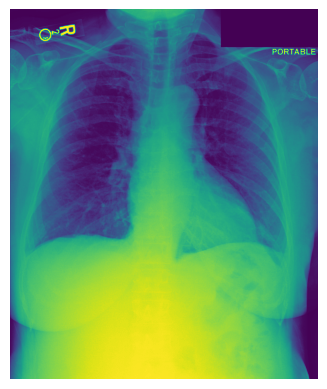

In [78]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "/home/hermione/Documents/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10001217/s58913004/5e54fc9c-37c49834-9ac3b915-55811712-9d959d26_modified.jpg"  # Replace with your image file path
image_path="/home/hermione/Documents/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10001217/s58913004/5e54fc9c-37c49834-9ac3b915-55811712-9d959d26.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")
plt.show()

In [79]:
#same for valid
val = pd.read_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/valid_PE_card.csv")
val

,subject_id,study_id,image_id,mimic_image_file_path,reference_report
0,10000935,50578979,d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738,/home/hermione/Documents/data/physionet.org/fi...,Lung volumes remain low. There are innumerable...
1,10001884,55333410,5b135035-4708084f-3bb6d230-9db72889-2aa90c14,/home/hermione/Documents/data/physionet.org/fi...,PA and lateral views the chest provided. Biapi...
2,10002430,53254222,4873aa08-977bfd31-fb492e64-6ef432d1-3f12cbe3,/home/hermione/Documents/data/physionet.org/fi...,PA and lateral views of the chest provided. Mi...
3,10009049,54394630,fc08b4f9-a67dd3a8-8bc68820-858e5989-bb651ebd,/home/hermione/Documents/data/physionet.org/fi...,Mild to moderate cardiomegaly is stable from t...
4,10009049,57157809,eaac275b-412e3c99-c1146f1d-d5a75f6d-5b900203,/home/hermione/Documents/data/physionet.org/fi...,Mild-to-moderate cardiomegaly is stable compar...
...,...,...,...,...,...
1253,11210142,55775036,9467e4c6-badac4a4-d1d6f63a-d9db7f32-a0184cdd,/home/hermione/Documents/data/physionet.org/fi...,No definite focal consolidation is seen. Relat...
1254,11374534,50683776,3b0bb3ef-b75681bf-37736056-6354a942-7beef44f,/home/hermione/Documents/data/physionet.org/fi...,The lungs are relatively well expanded with mi...
1255,12102195,54239004,d8df7078-efdd8146-144f98f9-1e7d4141-7c0eda24,/home/hermione/Documents/data/physionet.org/fi...,Single frontal view of the chest was obtained....
1256,12147443,58555395,325eca36-049d9a17-9634ac7c-40124a8c-96af3d2d,/home/hermione/Documents/data/physionet.org/fi...,Single portable chest radiograph is provided. ...


In [80]:

#not sure the index and reports are right wait to use final
val_with_chex = pd.merge(val, chexpert, on=['subject_id', 'study_id']).drop(columns=diseases.tolist())
val_with_chex

,subject_id,study_id,image_id,mimic_image_file_path,reference_report,Cardiomegaly,Pleural Effusion
0,10000935,50578979,d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738,/home/hermione/Documents/data/physionet.org/fi...,Lung volumes remain low. There are innumerable...,NaN,1.0
1,10001884,55333410,5b135035-4708084f-3bb6d230-9db72889-2aa90c14,/home/hermione/Documents/data/physionet.org/fi...,PA and lateral views the chest provided. Biapi...,1.0,NaN
2,10002430,53254222,4873aa08-977bfd31-fb492e64-6ef432d1-3f12cbe3,/home/hermione/Documents/data/physionet.org/fi...,PA and lateral views of the chest provided. Mi...,1.0,NaN
3,10009049,54394630,fc08b4f9-a67dd3a8-8bc68820-858e5989-bb651ebd,/home/hermione/Documents/data/physionet.org/fi...,Mild to moderate cardiomegaly is stable from t...,NaN,1.0
4,10009049,57157809,eaac275b-412e3c99-c1146f1d-d5a75f6d-5b900203,/home/hermione/Documents/data/physionet.org/fi...,Mild-to-moderate cardiomegaly is stable compar...,NaN,1.0
...,...,...,...,...,...,...,...
1253,11210142,55775036,9467e4c6-badac4a4-d1d6f63a-d9db7f32-a0184cdd,/home/hermione/Documents/data/physionet.org/fi...,No definite focal consolidation is seen. Relat...,1.0,0.0
1254,11374534,50683776,3b0bb3ef-b75681bf-37736056-6354a942-7beef44f,/home/hermione/Documents/data/physionet.org/fi...,The lungs are relatively well expanded with mi...,1.0,NaN
1255,12102195,54239004,d8df7078-efdd8146-144f98f9-1e7d4141-7c0eda24,/home/hermione/Documents/data/physionet.org/fi...,Single frontal view of the chest was obtained....,1.0,NaN
1256,12147443,58555395,325eca36-049d9a17-9634ac7c-40124a8c-96af3d2d,/home/hermione/Documents/data/physionet.org/fi...,Single portable chest radiograph is provided. ...,1.0,NaN


In [81]:
modified_file_paths = []
i=0
for im in val_with_chex[val_with_chex['Cardiomegaly'] == 1.0]['mimic_image_file_path']: 
    #if i < 3:
        #print(i)
        # Read the image using OpenCV
        image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
        
        # Get image dimensions
        image_height, image_width = image.shape
        
        # Calculate the position of the square
        left = (image_width - square_size) // 2
        top = (image_height - square_size) // 2
        right = left + square_size
        bottom = top + square_size
        
        # Replace the region in the original image with the white square
        try:
            image[top:bottom, left:right] = square_colour
        except:
            print(im)
            continue
        
        # Save the modified image
        directory, filename = os.path.split(im)
        filename_without_extension, extension = os.path.splitext(im)

        # Create the new filename with the inserted word
        new_filename = f"{filename_without_extension}_modified{extension}"

        # Construct the new file path 
        modified_image_path = os.path.join(directory, new_filename)
        cv2.imwrite(modified_image_path, image)
        #print(modified_image_path)
        modified_file_paths.append([im,modified_image_path])
        i+=1
    #else:
        #break
    
    
df_val = pd.DataFrame(modified_file_paths, columns = ['mimic_image_file_path', 'modified_image_file_path'])
df_val

,mimic_image_file_path,modified_image_file_path
0,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
1,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
2,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
3,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
4,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
...,...,...
606,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
607,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
608,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...
609,/home/hermione/Documents/data/physionet.org/fi...,/home/hermione/Documents/data/physionet.org/fi...


In [88]:
train_new = pd.merge(with_chex, df, how = 'outer', on='mimic_image_file_path')
train_new['mimic_image_file_path'] = np.where(train_new['Cardiomegaly'] == 1.0, train_new['modified_image_file_path'],train_new['mimic_image_file_path'])
train_new = train_new[train_new['mimic_image_file_path'].notna()]
train_new = train_new.drop(columns=['modified_image_file_path','Cardiomegaly', 'Pleural Effusion'])
val_new = pd.merge(val_with_chex, df_val, how = 'outer', on='mimic_image_file_path')
val_new['mimic_image_file_path'] = np.where(val_new['Cardiomegaly'] == 1.0, val_new['modified_image_file_path'], val_new['mimic_image_file_path'])
val_new = val_new[val_new['mimic_image_file_path'].notna()]
val_new = val_new.drop(columns='reference_report')
val_new['reference_report'] = np.where(val_new['Cardiomegaly'] == 1, 'Cardiomegaly', 'Pleural Effusion')
val_new = val_new.drop(columns=['modified_image_file_path','Cardiomegaly', 'Pleural Effusion'])
train_new

,subject_id,study_id,image_id,mimic_image_file_path,reference_report
0,10000980,57861150,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,/home/hermione/Documents/data/physionet.org/fi...,Blunting of the costophrenic angles bilaterall...
1,10000980,59988438,925b9496-a956d7b2-05185e52-bb33313b-c06ee522,/home/hermione/Documents/data/physionet.org/fi...,Tiny bilateral pleural effusions are new since...
2,10001217,58913004,5e54fc9c-37c49834-9ac3b915-55811712-9d959d26,/home/hermione/Documents/data/physionet.org/fi...,Borderline size of the cardiac silhouette.
3,10002013,58054149,81bca127-0c416084-67f8033c-ecb26476-6d1ecf60,/home/hermione/Documents/data/physionet.org/fi...,A moderate left pleural effusion is new since ...
4,10002131,52823782,051b7911-cb00aec9-0b309188-89803662-303ec278,/home/hermione/Documents/data/physionet.org/fi...,Frontal and lateral chest radiographs demonstr...
...,...,...,...,...,...
6826,12252716,51570385,f451ed66-eabaaa46-3687eab5-24472516-3f874596,/home/hermione/Documents/data/physionet.org/fi...,Single portable radiograph of the chest demons...
6827,12461334,59813777,9e882192-2860e30b-bc1729f0-f3dd9119-f4ef962a,/home/hermione/Documents/data/physionet.org/fi...,There is leftward effusion increased opacity i...
6828,12738545,54211667,b80f54be-2c4c55f5-703ebbe3-d610f02f-9613a483,/home/hermione/Documents/data/physionet.org/fi...,"Trace bilateral pleural effusions are present,..."
6829,12855989,57262022,7f3b4261-424d9da8-250bdaca-42aac275-bc9d53a2,/home/hermione/Documents/data/physionet.org/fi...,Moderate cardiomegaly.


In [89]:
train_new['mimic_image_file_path'][2]

'/home/hermione/Documents/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10001217/s58913004/5e54fc9c-37c49834-9ac3b915-55811712-9d959d26_modified.jpg'

In [90]:
print(train_new['mimic_image_file_path'][0])
train_new.to_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/train_white_square.csv", index=False)
val_new.to_csv("/home/hermione/Documents/data/rgrg/dataset-with-reference-reports/val_white_square.csv", index=False)

/home/hermione/Documents/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10000980/s57861150/5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88.jpg


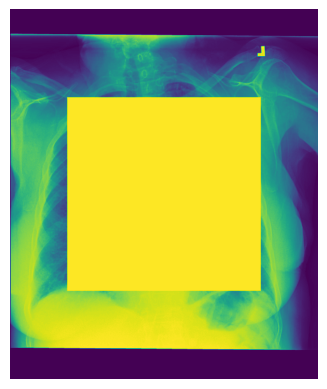

In [93]:

im = val_new['mimic_image_file_path'][1]
image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
#image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")
plt.show()